In [ ]:
import matplotlib.pyplot as plt
sns.set()

In [ ]:
%load_ext autoreload
%autoreload 2
!pip install turicreate
import pandas as pd
import numpy as np
import time
import turicreate as tc
import random
from sklearn.model_selection import train_test_split

import sys
sys.path.append("..")

#For content based recommendation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/ty2020/reco.csv.gz')

In [ ]:
df.head()

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink
0,20.08.2020 06:00,335057357,86386,39328996,919155,418,Sandalet,Kadın,319.98,14.0,Branded Shoes B,https://cdn.dsmcdn.com//ty1/product/media/imag...
1,24.08.2020 10:00,337401625,59469,31903343,121,1827,Banyo Dolabı,Unisex,1195.56,3.0,Bahçe & Yapı Market & Hırdavat,https://cdn.dsmcdn.com//assets/product/media/i...
2,26.08.2020 19:00,338457012,51248,34726400,40,604,T-Shirt,Kadın,37.99,14.0,PL Woman,https://cdn.dsmcdn.com//assets/product/media/i...
3,22.08.2020 11:00,336681542,29380,32920640,7651,604,T-Shirt,Kadın,24.99,6.0,Kadın A,https://cdn.dsmcdn.com//assets/product/media/i...
4,20.08.2020 19:00,335736916,68368,39035716,3395,599,Kazak,Kadın,79.90,16.0,Kadın A,https://cdn.dsmcdn.com//ty1/product/media/imag...


In [ ]:
df.isnull().sum()


partition_date           0
orderparentid            0
user_id                  0
productcontentid         0
brand_id                 0
category_id              0
category_name            0
gender               32735
price                    0
color_id            132558
business_unit            0
ImageLink                0
dtype: int64

# Task 14-A Find the most common user_id, productcontentid, brand_id, category_id and color_id

In [ ]:
df.groupby('user_id')['user_id'].count().sort_values(ascending=False).head(5)

user_id
85115    6425
26839     855
14468     537
15659     497
78168     484
Name: user_id, dtype: int64

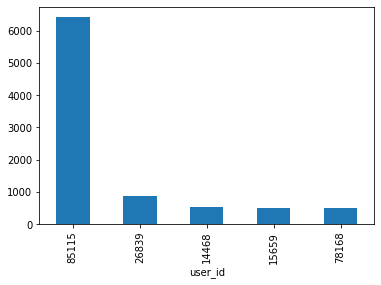

In [ ]:
df.groupby('user_id')['user_id'].count().sort_values(ascending=False).head(5).plot(kind='bar')

In [ ]:
user_id = df.groupby('user_id')['user_id'].count().sort_values(ascending=False).head(5)
plt.figure.figsize=()

In [ ]:
df.groupby('brand_id')['brand_id'].count().sort_values(ascending=False).head(5)

brand_id
40       49016
7651     24754
15508    11505
3268      7878
842       7446
Name: brand_id, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
categories = df.groupby('category_id')['category_id'].count().sort_values(ascending=False).head(5)
categories

category_id
604     45830
1182    20726
590     11207
975      9045
4025     8874
Name: category_id, dtype: int64

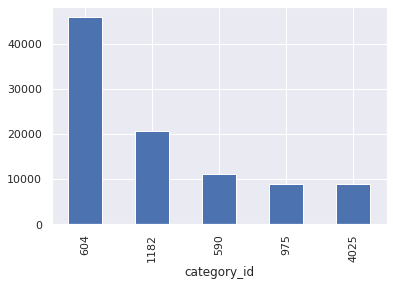

In [ ]:
categories.plot(kind='bar')

In [ ]:
cat =  df.groupby('category_id')['category_id'].count().sort_values(ascending=False)

In [ ]:
colors = df.groupby('color_id')['color_id'].count().sort_values(ascending=False).head(5)
colors

color_id
3.0     104190
14.0     82034
4.0      21862
8.0      21796
12.0     20991
Name: color_id, dtype: int64

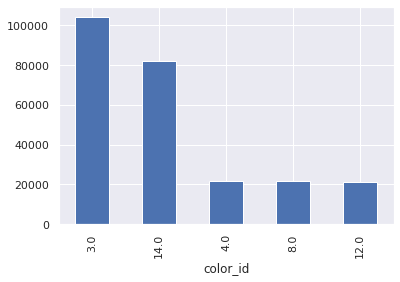

In [ ]:
colors.plot(kind='bar')

In [ ]:
df['color_id'].nunique()

34

In [ ]:
content_id = df.groupby('productcontentid')['productcontentid'].count().sort_values(ascending=False)
content_id[:5]

productcontentid
39832331    2864
42565353     782
43524099     747
6635654      602
3735203      506
Name: productcontentid, dtype: int64

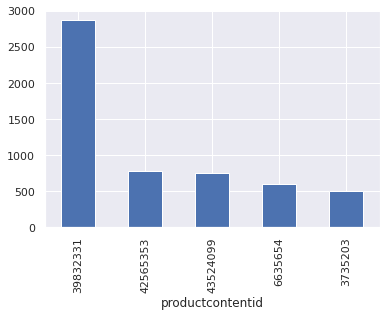

In [ ]:
content_id[:5].plot(kind='bar')

# TASK-14B: Please provide histograms for the relevant columns and provide your comments very briefly.

(array([5.06731e+05, 1.23300e+03, 1.29000e+02, 1.05000e+02, 1.70000e+01,
        1.10000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([1.0000000e-02, 2.4149380e+03, 4.8298660e+03, 7.2447940e+03,
        9.6597220e+03, 1.2074650e+04, 1.4489578e+04, 1.6904506e+04,
        1.9319434e+04, 2.1734362e+04, 2.4149290e+04]),
 <a list of 10 Patch objects>)

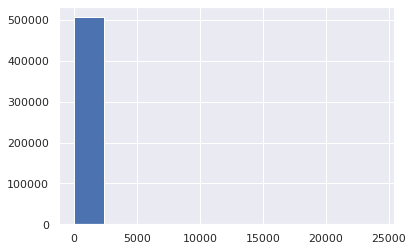

In [ ]:
price = df['price']
plt.hist(price) # before scaling price values seem weird

(array([5.06731e+05, 1.23300e+03, 1.29000e+02, 1.05000e+02, 1.70000e+01,
        1.10000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([1.0000000e-02, 2.4149380e+03, 4.8298660e+03, 7.2447940e+03,
        9.6597220e+03, 1.2074650e+04, 1.4489578e+04, 1.6904506e+04,
        1.9319434e+04, 2.1734362e+04, 2.4149290e+04]),
 <a list of 10 Patch objects>)

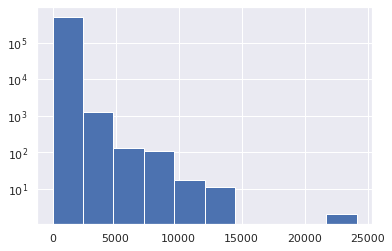

In [ ]:
plt.yscale("log")  
plt.hist(price) # after log transformation price values seem more meaningful.

(array([25.,  4.,  3.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([1.00000e+00, 1.04199e+04, 2.08388e+04, 3.12577e+04, 4.16766e+04,
        5.20955e+04, 6.25144e+04, 7.29333e+04, 8.33522e+04, 9.37711e+04,
        1.04190e+05]),
 <a list of 10 Patch objects>)

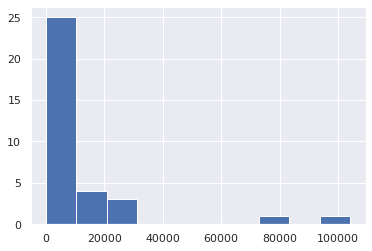

In [ ]:
color = df.groupby('color_id')['color_id'].count().sort_values()
plt.hist(color)

(array([25.,  4.,  3.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([1.00000e+00, 1.04199e+04, 2.08388e+04, 3.12577e+04, 4.16766e+04,
        5.20955e+04, 6.25144e+04, 7.29333e+04, 8.33522e+04, 9.37711e+04,
        1.04190e+05]),
 <a list of 10 Patch objects>)

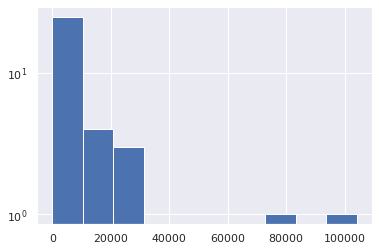

In [ ]:
plt.yscale("log")  
plt.hist(color)

# TASK-14C: Please provide pivot table for illustrating the distribution of product genders with respect to the business units.

In [ ]:
pd.set_option('display.max_columns', 1000)

In [ ]:
pd.pivot_table(df, columns = 'business_unit', index ='gender', aggfunc='count') 

ImageLink                                \
business_unit  Aksesuar Anne & Bebek Bakım Aydınlatma   
gender                                                  
Erkek               1.0               19.0        5.0   
Kadın               2.0              195.0       32.0   
Unisex              6.0             3182.0     3412.0   

                                                                      \
business_unit Bahçe & Yapı Market & Hırdavat Bahçe Mobilyası   Banyo   
gender                                                                 
Erkek                                   26.0             4.0    46.0   
Kadın                                   45.0            11.0   945.0   
Unisex                                5866.0          1111.0  5783.0   

                                              \
business_unit Bebek Bezi & Mendil Beyaz Eşya   
gender                                         
Erkek                         4.0        NaN   
Kadın                         9.0        4.0   
Unisex                     4801.0      917.0   

                                                                           \
business_unit Bilgisayar & Tablet & Aksesuarları    Books Branded Shoes A   
gender                                                                      
Erkek                                        7.0     10.0          1672.0   
Kadın                                       15.0     27.0          2948.0   
Unisex                                    3234.0  10808.0           176.0   

                                                                       \
business_unit Branded Shoes B Büyük Beden Cep Telefonu & Aksesuarları   
gender                                                                  
Erkek                  2566.0        62.0                        18.0   
Kadın                 10910.0      2111.0                        25.0   
Unisex                 1784.0       203.0                      7794.0   

                                                                            \
business_unit Cilt Bakım Designer Diğer Aksesuarlar Elektrikli Ev Aletleri   
gender                                                                       
Erkek               59.0    108.0             277.0                    NaN   
Kadın             8295.0    163.0            1533.0                   68.0   
Unisex            8771.0     38.0            1752.0                 3384.0   

                                                                             \
business_unit Elektronik Erkek A Erkek B Ev Bakım ve Temizlik Ev Dekorasyon   
gender                                                                        
Erkek                NaN  4300.0  5444.0                  1.0           4.0   
Kadın                NaN    12.0    51.0                  8.0         235.0   
Unisex               1.0     3.0   558.0               4996.0        8371.0   

                                                                   \
business_unit Ev Gereçleri Ev Giyim Ev Tekstil FMCG Fantezi Giyim   
gender                                                              
Erkek                  3.0    545.0       29.0  NaN          22.0   
Kadın                 87.0   3504.0      630.0  NaN        1250.0   
Unisex              6807.0    357.0     7039.0  4.0          80.0   

                                                                         \
business_unit Foto & Kamera  GAS GAS Casual GAS Denim Gözlük A Gözlük B   
gender                                                                    
Erkek                   1.0  1.0     3798.0    2523.0     57.0    164.0   
Kadın                   2.0  2.0     1799.0    1459.0    181.0   2135.0   
Unisex                558.0  4.0      152.0     122.0    217.0   1773.0   

                                                                       \
business_unit Gıda ve İçecek Halı/Kilim Hamile Giyim    Hobi  Kadın A   
gender                                                                  
Erkek             

In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:
pd.pivot_table(df, values='user_id',columns = 'gender', index ='business_unit', aggfunc='count') 

gender,Erkek,Kadın,Unisex
business_unit,,,
Aksesuar,1.0,2.0,6.0
Anne & Bebek Bakım,19.0,195.0,3182.0
Aydınlatma,5.0,32.0,3412.0
Bahçe & Yapı Market & Hırdavat,26.0,45.0,5866.0
Bahçe Mobilyası,4.0,11.0,1111.0
Banyo,46.0,945.0,5783.0
Bebek Bezi & Mendil,4.0,9.0,4801.0
Beyaz Eşya,NaN,4.0,917.0
Bilgisayar & Tablet & Aksesuarları,7.0,15.0,3234.0


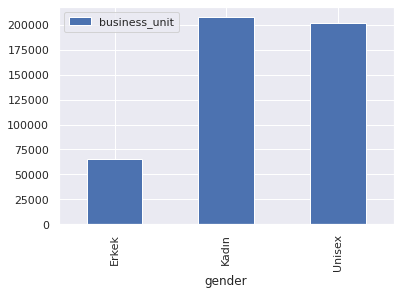

In [ ]:
pd.pivot_table(df, values = 'business_unit', index ='gender', aggfunc='count').plot(kind='bar')

# TASK-14D: Please provide the price histogram for the most frequent 3 category names separately.

In [ ]:
df.groupby('category_id')['category_id'].count().sort_values(ascending=False)[:3]

category_id
604     45830
1182    20726
590     11207
Name: category_id, dtype: int64

In [ ]:
df[df['category_id']==604]['business_unit'].unique()

array(['PL Woman', 'Kadın A', 'GAS Denim', 'GAS Casual', 'Kadın B',
       'Erkek A', 'PL Erkek', 'Kids & Baby Fashion', 'Erkek B',
       'Sportswear', 'Luxury', 'Büyük Beden', 'İç Giyim', 'Outdoor',
       'Mayo', 'Ev Tekstil', 'Ev Giyim', 'Branded Shoes B', 'PL Homewear',
       'Çocuk', 'Sport Equipment', 'Designer', 'Branded Shoes A',
       'PL Party & Wedding', 'Konservatif', 'Makyaj'], dtype=object)

In [ ]:
df[df['category_id']==590]['price'].unique()

array([ 39.99  ,  22.99  ,  24.99  ,  46.99  ,  26.09  ,  44.99  ,
        59.99  ,  34.99  ,  15.    ,  42.95  ,   9.99  ,  49.99  ,
        14.99  ,  28.99  ,  34.9   ,  69.99  , 129.9   ,  59.9   ,
        84.5   ,  29.99  ,  17.49  ,  27.95  ,  53.99  ,  99.99  ,
        74.99  ,  24.95  ,  35.99  ,  24.5   ,  41.99  ,  49.85  ,
        63.95  ,  89.9   ,  54.99  ,  79.99  ,  77.99  ,  20.99  ,
        16.67  ,  49.5   ,  37.95  ,  16.95  ,  44.95  ,  26.99  ,
        37.99  ,  51.99  ,  29.75  ,  23.99  ,  22.95  ,  16.39  ,
        21.99  ,  97.95  ,  49.9   ,  35.    ,  29.    ,  42.99  ,
        43.92  ,  19.95  ,  69.9   ,  39.9   ,  32.99  ,  42.71  ,
        55.99  ,  27.9   ,  99.98  ,  36.99  ,  19.99  ,  89.7   ,
        43.99  ,  27.99  ,  22.26  ,  34.25  ,  19.9   ,  55.    ,
        48.99  ,  31.99  ,  17.95  , 179.    ,  26.39  ,  16.76  ,
        70.99  ,  73.99  , 127.99  ,  33.99  ,  26.5   ,  34.39  ,
        63.99  ,  57.99  ,  11.39  ,  39.95  ,  58.17  ,  79.9

(array([6.205e+03, 4.595e+03, 2.950e+02, 7.300e+01, 2.200e+01, 6.000e+00,
        7.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([  1. ,  45.9,  90.8, 135.7, 180.6, 225.5, 270.4, 315.3, 360.2,
        405.1, 450. ]),
 <a list of 10 Patch objects>)

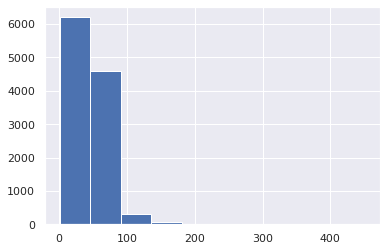

In [ ]:
plt.hist(df[df['category_id']==590]['price']) # scale kullanmadığım için 200'den sonra fiyat görünmüyor ama fiyat değerinde 287 bulunuyor.

(array([6.205e+03, 4.595e+03, 2.950e+02, 7.300e+01, 2.200e+01, 6.000e+00,
        7.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([  1. ,  45.9,  90.8, 135.7, 180.6, 225.5, 270.4, 315.3, 360.2,
        405.1, 450. ]),
 <a list of 10 Patch objects>)

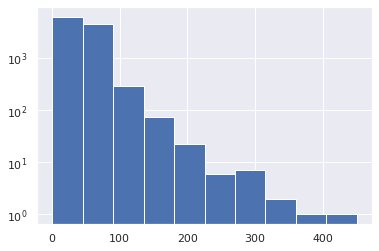

In [ ]:
first_price = df[df['category_id']==590]['price']
# convert y-axis to Logarithmic scale
plt.yscale("log")  
plt.hist(first_price)

(array([1.9792e+04, 8.0800e+02, 8.7000e+01, 2.1000e+01, 6.0000e+00,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([   3.99 ,  163.591,  323.192,  482.793,  642.394,  801.995,
         961.596, 1121.197, 1280.798, 1440.399, 1600.   ]),
 <a list of 10 Patch objects>)

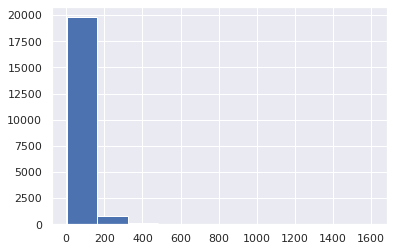

In [ ]:
plt.hist(df[df['category_id']==1182]['price'])

(array([1.9792e+04, 8.0800e+02, 8.7000e+01, 2.1000e+01, 6.0000e+00,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([   3.99 ,  163.591,  323.192,  482.793,  642.394,  801.995,
         961.596, 1121.197, 1280.798, 1440.399, 1600.   ]),
 <a list of 10 Patch objects>)

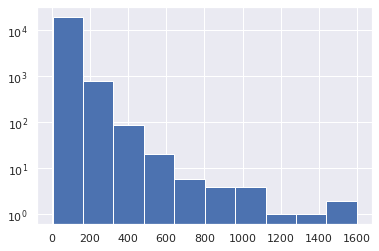

In [ ]:
pricee = df[df['category_id']==1182]['price']
# convert y-axis to Logarithmic scale
plt.yscale("log")  
plt.hist(pricee)

(array([4.465e+04, 1.111e+03, 4.700e+01, 8.000e+00, 9.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([   3.99 ,  125.372,  246.754,  368.136,  489.518,  610.9  ,
         732.282,  853.664,  975.046, 1096.428, 1217.81 ]),
 <a list of 10 Patch objects>)

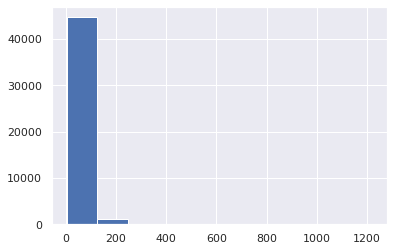

In [ ]:
plt.hist(df[df['category_id']==604]['price'])

(array([4.465e+04, 1.111e+03, 4.700e+01, 8.000e+00, 9.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([   3.99 ,  125.372,  246.754,  368.136,  489.518,  610.9  ,
         732.282,  853.664,  975.046, 1096.428, 1217.81 ]),
 <a list of 10 Patch objects>)

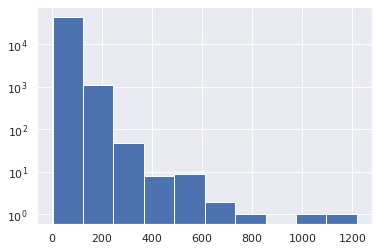

In [ ]:
price = df[df['category_id']==604]['price']
# convert y-axis to Logarithmic scale
plt.yscale("log")  
plt.hist(price)

# TASK-14E: Please find the customer who has spent the highest amount of money.

In [ ]:
df.groupby('user_id')['price'].sum().sort_values(ascending=False)

user_id
85115    580432.5683
54485    111366.2300
26839     71485.3100
77877     53549.5100
66298     43914.5500
            ...     
9441          0.3000
9224          0.3000
9443          0.3000
9717          0.3000
9690          0.3000
Name: price, Length: 108944, dtype: float64

### customer who spent most is : 85115

In [ ]:
df[df['user_id']==85115]

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink
4455,23.08.2020 10:00,337016597,85115,4819858,3519,411,Casual Ayakkabı,Kadın,49.99,11.0,Kids & Baby Fashion,https://cdn.dsmcdn.com//Assets/ProductImages/o...
4459,21.08.2020 09:00,336106456,85115,35636359,7651,1182,Elbise,Kadın,35.99,16.0,Kids & Baby Fashion,https://cdn.dsmcdn.com//assets/product/media/i...
4464,19.08.2020 07:00,334181427,85115,32099052,7651,597,Gömlek,Erkek,39.99,19.0,Kadın A,https://cdn.dsmcdn.com//assets/product/media/i...
4466,22.08.2020 13:00,336732891,85115,42542257,842,526,Etek,Unisex,39.99,9.0,Kids & Baby Fashion,https://cdn.dsmcdn.com//ty6/product/media/imag...
4468,25.08.2020 10:00,337805221,85115,44596894,7651,563,Pijama Takımı,Kadın,44.99,3.0,Kids & Baby Fashion,https://cdn.dsmcdn.com//ty7/product/media/imag...
...,...,...,...,...,...,...,...,...,...,...,...,...
502939,12.08.2020 08:00,330191929,85115,35778068,2179,975,Sneaker,Kadın,153.83,14.0,Branded Shoes B,https://cdn.dsmcdn.com//assets/product/media/i...
502940,28.07.2020 06:00,324364633,85115,37561021,13502,619,Oje,Unisex,12.99,3.0,Makyaj,https://cdn.dsmcdn.com//assets/dev/product/med...
502965,28.07.2020 18:00,324641834,85115,6742993,10107,1255,Gümüş Küpe,Kadın,112.90,12.0,Takı,https://cdn.dsmcdn.com//assets/product/media/i...
502967,12.08.2020 07:00,330180392,85115,34892831,59,407,Bot & Bootie,Kadın,499.50,14.0,Branded Shoes A,https://cdn.dsmcdn.com//assets/product/media/i...


# TASK-14F: Please find the customer(s) who has the most various brands, then categories and then business units.

In [ ]:
df.groupby(['user_id','brand_id'])['brand_id'].count().sort_values(ascending=False)

user_id  brand_id
85115    7651        1903
         3268         710
         842          330
26839    7651         189
78168    7651         173
                     ... 
80067    7534           1
         12159          1
         16314          1
         20684          1
101      38680          1
Name: brand_id, Length: 358101, dtype: int64

In [ ]:
pd.pivot_table(df, columns = 'business_unit', index ='gender', aggfunc='count') 

In [ ]:
pd.pivot_table(df, values = 'brand_id', index ='user_id', aggfunc='count')

,brand_id
user_id,
101,2
102,2
103,3
104,5
105,6
...,...
112533,5
112534,5
112535,1


# TASK-14G: Please find the product that is sold at the highest level between 12.08.2020 and 15.08.2020

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508228 entries, 0 to 508227
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   partition_date    508228 non-null  object 
 1   orderparentid     508228 non-null  int64  
 2   user_id           508228 non-null  int64  
 3   productcontentid  508228 non-null  int64  
 4   brand_id          508228 non-null  int64  
 5   category_id       508228 non-null  int64  
 6   category_name     508228 non-null  object 
 7   gender            475493 non-null  object 
 8   price             508228 non-null  float64
 9   color_id          375670 non-null  float64
 10  business_unit     508228 non-null  object 
 11  ImageLink         508228 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 46.5+ MB


In [ ]:
df.head(2)

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink
0,2020-08-20 06:00:00,335057357,86386,39328996,919155,418,Sandalet,Kadın,319.98,14.0,Branded Shoes B,https://cdn.dsmcdn.com//ty1/product/media/imag...
1,2020-08-24 10:00:00,337401625,59469,31903343,121,1827,Banyo Dolabı,Unisex,1195.56,3.0,Bahçe & Yapı Market & Hırdavat,https://cdn.dsmcdn.com//assets/product/media/i...


In [ ]:
df['partition_date'] = pd.to_datetime(df['partition_date'])

In [ ]:
start_date = '2020-08-12'
end_date = '2020-08-15'
mask = df[(df['partition_date'] >= start_date) & (df['partition_date'] <= end_date)].sort_values(by='partition_date')
mask['price'].max()

11736.0

In [ ]:
mask[mask['price']==11736.0]

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink
483237,2020-08-14 09:00:00,331056847,61010,35446583,20255,1583,Dizüstü Bilgisayar,Unisex,11736.0,12.0,Bilgisayar & Tablet & Aksesuarları,https://cdn.dsmcdn.com//assets/product/media/i...


# TASK-14H: Please find the unisex product that has the highest price.

In [ ]:
df.groupby('gender')['price'].max() # first I looked 

gender
Erkek      4639.00
Kadın     24149.29
Unisex    13879.00
Name: price, dtype: float64

In [ ]:
df[(df['gender']=='Unisex')& (df['price']==13879.00)]

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink
394893,21.08.2020 18:00,336425773,82216,32055404,1617,3719,Akıllı Cep Telefonu,Unisex,13879.0,9.0,Cep Telefonu & Aksesuarları,https://cdn.dsmcdn.com//assets/product/media/i...


# TASK-14I: Please determine the product id that brought the highest amount of money/cash.

In [ ]:
df[df['price']==df['price'].max()]

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink
404758,24.08.2020 13:00,337470666,58429,6040892,34357,1232,Gram Altın,Kadın,24149.29,NaN,Mücevher,https://cdn.dsmcdn.com//Assets/ProductImages/o...


In [ ]:
df[df['price']==df['price'].max()]['brand_id']

404758    34357
Name: brand_id, dtype: int64

#TASK-14J: Please the number of different products that is for female and has the color codes 8, 11, or 9.

In [ ]:
# Below we can see values for color_id 8, 9 and 11, but we need to see values of 8, 9 and 11 for women.
pd.pivot_table(df, values='user_id', index='gender', columns='color_id', aggfunc='count')

color_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0,6996.0,6997.0,6998.0,6999.0,7000.0,7002.0,7003.0,7004.0,7007.0,7008.0,7009.0,7011.0,7012.0,7013.0
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Erkek,97.0,1329.0,11294.0,7431.0,680.0,1549.0,1717.0,9304.0,4471.0,53.0,480.0,814.0,1651.0,15663.0,272.0,1121.0,2642.0,1109.0,603.0,1747.0,2.0,NaN,8.0,2.0,1.0,1.0,NaN,1.0,NaN,2.0,26.0,NaN,NaN,1.0
Kadın,2525.0,10643.0,33039.0,9698.0,2478.0,7981.0,5894.0,10719.0,10500.0,528.0,6715.0,14908.0,4243.0,48371.0,656.0,3380.0,5870.0,2660.0,6384.0,2880.0,3.0,1.0,57.0,NaN,NaN,3.0,NaN,3.0,1.0,1.0,NaN,NaN,1.0,NaN
Unisex,1226.0,2812.0,54518.0,4371.0,1389.0,4114.0,2367.0,1726.0,3490.0,900.0,1822.0,4866.0,1684.0,15705.0,439.0,4527.0,2417.0,671.0,762.0,241.0,5.0,NaN,16.0,71.0,12.0,3.0,3.0,5.0,NaN,9.0,36.0,6.0,6.0,2.0


In [ ]:
# here I took values for women, and grouped it by color_id
colors = df[(df['gender']=='Kadın') & ((df['color_id']==8) | (df['color_id']==9) | (df['color_id']==11))]
colors.groupby('color_id')['color_id'].count()

color_id
8.0     10719
9.0     10500
11.0     6715
Name: color_id, dtype: int64